### **A1.2 Regresión lineal simple**

**1.** En la siguiente celda se importa la base de datos "Felicidad y GDP.csv" usando la función **read_csv()** de la librería **pandas**. El archivo proporciona datos sobre el nivel de felicidad y producto interno bruto (GDP) sobre 141 países diferentes.

Usando la función **head()** con un parámetro de 10, se imprimen las primeras 10 filas. La base de datos esta previamente ordenada de forma descendente tomando en cuenta el nivel de felicidad por lo cual se muestran los 10 países con mayor nivel de felicidad.

In [152]:
import pandas as pd
df = pd.read_csv("A1.2 Felicidad y GDP.csv")
print('Top 10 países más felices \n')
df.head(10)

Top 10 países más felices 



,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
5,Luxembourg,7.4040,7.335313e+10
6,Sweden,7.3843,5.414870e+11
7,Norway,7.3651,3.621980e+11
8,Israel,7.3638,4.071010e+11
9,New Zealand,7.1998,2.117350e+11


A continuación, se reorganiza la base de datos utilizando la función **sort_values()** para mostrar de forma descendente los 10 países con mayor GDP.

In [153]:
df.sort_values('GDP',ascending = False);
print()
print('Top 10 países con mayor GDP \n')
df.head(10)


Top 10 países con mayor GDP 



,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
5,Luxembourg,7.4040,7.335313e+10
6,Sweden,7.3843,5.414870e+11
7,Norway,7.3651,3.621980e+11
8,Israel,7.3638,4.071010e+11
9,New Zealand,7.1998,2.117350e+11


**2.** En la siguiente celda, se utiliza la librería **matplotlib.pyplot (plt)** para graficar los datos del archivo. Al estar trabajando con números grandes hablando de GDP, como variable independiente se utilizará el logarítmo base 10 del GDP en lugar del valor mismo. Para encontrar dicho logarítmo se importa la librería **numpy (np)** para utilizar su función **log10()**.

Usando la función **plt.scatter()** (y algunas otras funciones para modificar formato) se grafican:

 **x: logarítmo base 10 del GDP**

  **y: nivel de felicidad**.

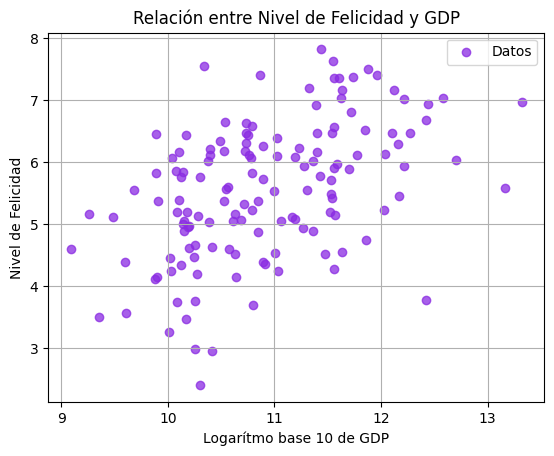

In [154]:
import numpy as np
import matplotlib.pyplot as plt
y = df['Felicidad'].values
x = np.log10(df['GDP'].values)
plt.scatter(x,y,label='Datos', alpha=0.75,color="blueviolet");
plt.title("Relación entre Nivel de Felicidad y GDP")
plt.xlabel("Logarítmo base 10 de GDP");
plt.ylabel("Nivel de Felicidad");
plt.grid();
plt.legend();

**3.** En la siguiente celda se inicia con el procedimiento de la **regresión lineal simple** calculando los valores óptimos para los dos coeficientes del modelo **β0** y **β1**.

Vale la pena mencionar que existen librerías y funciones diseñadas para facilitar el proceso de una regresión lineal simple, sin embargo, para los fines de este proyecto, se realizó el proceso paso a paso.

Para **β0** se calcula

 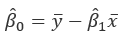

y para **β1**

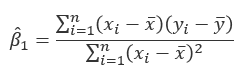

Ecuaciones para los cuales se calcula previamente el valor promedio de **x** y de **y**.

In [155]:
x_barra = sum(x) / len(x)
y_barra = sum(y) / len(y)
num = sum((xi - x_barra) * (yi - y_barra) for xi,yi in zip(x,y))
den = sum((xi - x_barra) ** 2 for xi in x)
B1 = num / den
B0 = y_barra - B1*x_barra
print("β0 =", B0)
print("β1 =", B1)

β0 = -1.3023500570747242
β1 = 0.6281284658810408


**4.** En la siguiente celda, se grafican de nuevo los datos junto con la **línea de regresión** resultante de la ecuación

**y = β0 + β1x**

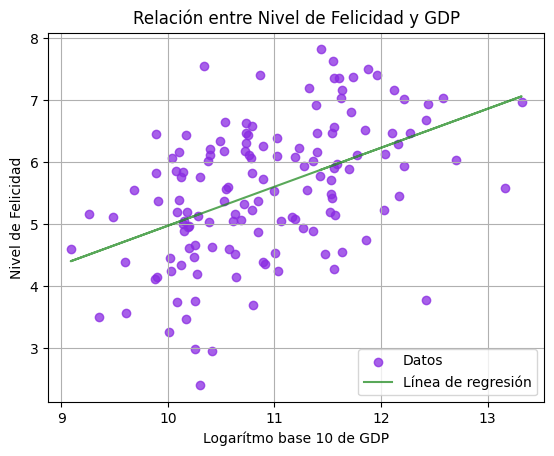

In [156]:
plt.scatter(x,y,label='Datos', alpha=0.75,color="blueviolet");
y_r = B0 + B1 * x
plt.plot(x,y_r, alpha = 0.75, color = "forestgreen", label = "Línea de regresión");
plt.title("Relación entre Nivel de Felicidad y GDP")
plt.xlabel("Logarítmo base 10 de GDP");
plt.ylabel("Nivel de Felicidad");
plt.grid();
plt.legend();

**5.** A continuación, se calcula el *Residual Sum of Squares (**RSS**)* apartir de la suma de los cuadrados de los errores (la diferencia) entre los datos y la línea de regresión.

In [157]:
rss = sum((yi - yi_r) **2 for yi,yi_r in zip(y,y_r))
print("RSS = ",rss)

RSS =  131.37383177326353


**6.** Ahora se calculan el *Error Estándar* (**SE**) e *intervalo de confianza* para **β1**.

Apartir del SE se calcula el intervalo de confianza y apartir de este se puede calcular, mediante el estadístico **t-student**, el **valor p** del modelo el cual muestra la **significancia** de la asociación entre el Nivel de Felicidad y el GDP.

In [158]:
import math
from scipy.stats import t
se_den = (len(x) - 2) * sum((xi-x_barra)**2 for xi in x)
se = math.sqrt(rss/se_den)
print("SE(B1) =",se)
int_conf = [(B1 - (2.23 * se)),(B1 +(2.23 * se))]
print("")
print("Intervalo de confianza de B1 \n","{", int_conf[0],"  ",int_conf[1],"}")
t_t = B1 / se
p = 2 * (1 - t.cdf(abs(t_t),(len(x)-2)))
print("")
print("En esta población, la asociación entre la felicidad y el GDP SI es significativa.")
print("Esto se sabe al calcular el valor p =",p)
print("el cual es menor a 0.05, lo cual indica que la probabilidad de que")
print("la asociación sea una causalidad es muy pequeña y por lo tanto debe")
print("existir una correlación.")

SE(B1) = 0.09983378435340728

Intervalo de confianza de B1 
 { 0.40549912677294253    0.850757804989139 }

En esta población, la asociación entre la felicidad y el GDP SI es significativa.
Esto se sabe al calcular el valor p = 3.825717964645037e-09
el cual es menor a 0.05, lo cual indica que la probabilidad de que
la asociación sea una causalidad es muy pequeña y por lo tanto debe
existir una correlación.


**7.** En la siguiente parte se calculan las métricas *Residual Standard Error* (**RSE**) y **R^2** del modelo.

Si el **RSE** es pequeño, los valores de las predicciones serán muy similares a los reales. Mientras que **R^2** indica la proporción en la que el comportamiento de y se puede explicar por x.

Para calcular dichas métricas también se calculan el *Total Sum of Squares* (**TSS**) y el *Explained Sum of Squares* (**ESS**).

In [159]:
rse = math.sqrt((1/(len(x)-2)) * sum((yi-yi_r)**2 for yi,yi_r in zip(y,y_r)))
print("RSE =",rse)
#Calcular R^2
tss = sum((yi-y_barra)**2 for yi in y)
ess = sum((yi_r - y_barra)**2 for yi_r in y_r)
r_sq = ess / tss
print("R^2 = ",r_sq)
print()
print("En mi opinión, el valor de R^2 es lo suficientemente bueno")
print("a pesar de ser relativamente pequeño. Su valor se ve claramente")
print("afectado por la dispersión entre los datos, sin embargo, es esto")
print("mismo lo que hace que un valor 'pequeño' signifique que el modelo")
print("se ajusta de manera correcta a los datos. Aun así, el valor bajo")
print("puede significar la influencia de más variables no tomadas en cuenta.")

RSE = 0.9721807858537377
R^2 =  0.22166361654970632

En mi opinión, el valor de R^2 es lo suficientemente bueno
a pesar de ser relativamente pequeño. Su valor se ve claramente
afectado por la dispersión entre los datos, sin embargo, es esto
mismo lo que hace que un valor 'pequeño' signifique que el modelo
se ajusta de manera correcta a los datos. Aun así, el valor bajo
puede significar la influencia de más variables no tomadas en cuenta.


**8.** Finalmente, con el objetivo de verificar los resultados obtenidos, se importa la librería **statsmodels.api** (**sm**) y se utiliza la función **OLS()** junto con las funciones **pvalues** y *scale* para obtener un resumen de lo que debería ser el modelo más adecuado de regresión lineal simple para la base de datos.

In [160]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())
print("P-values:",result.pvalues)
print("RSE:",result.scale ** 0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        06:20:44   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

### **Referencias**

*   Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J., Aknin, L. B., & Wang, S. (2022, March 18). World Happiness Report 2022. The World Happiness Report. https://worldhappiness.report/ed/2022/#appendices-and-data
*   World Bank Open Data. (n.d.). World Bank Open Data. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD





**Código de honor** Doy mi palabra de que he realizado esta actividad con integridad académica